# ELiXer Gridsearch

Very basic, repeated extraction of PSF spectra over a defined spatial grid (RA, Dec and gridstep size) with a defined wavelength and wavelength range

Output from ELiXer is a python file and two data files

The python file produces two 2D and one 3D plots with choice of values to plot ('x0' (i.e. line center), 'fitflux', 'continuum_level', 'velocity_offset' (i.e. from the provided wavelength), 'sigma' (i.e. of the fit emission line at each grid point), 'rmse', 'snr', 'meanflux_density', 'velocity_offset_limit')


In [ ]:
#if you want to update ELiXer and/or HETDEX_API
!cd /home/jovyan/software/hetdex_api; git stash; git pull
!cd /home/jovyan/software/elixer; git stash; git pull

In [30]:
from hetdex_api.elixer_widget_cls import ElixerWidget
import matplotlib
%matplotlib notebook

# ELiXer Call

The elixer call can be just like any other, with the addition of the --gridsearch  keyword. If running in SLURM, you will get the 3 additional output files for each detection or coordinate passed in from the --dets or --coords keyword files.

The --gridsearch keyword has 5 parameters (comma separated)
* half-side width of the grid in arcsecs (the grid is always square in coordinate space). A value of 3.0, for example, means 3.0" in RA and Dec from the center position, so 6.0 arcsecs on a side.
* resolution or size of the grid step
* emission line range or velocity offset to fit in km/s
* maximum FWHM, in angstrom, to fit the emission line
* plot toggle (0 or 1) ... if 1, immediately pop up an interactive plot on completeion ... generally this should not be used and if it is, should only be on a single object (detection or coordinate) call

The center of the gridsearch comes from the --ra  --dec elixer command line keywords or from the RA, Dec of the detection specified in the --dets file or --dets detectID or from the --coords file.

The wavelength comes from the HETDEX detection or as specified by --wavelength on the command line or in the --coords file

If there are multiple matching shotids and no --shotid is specified (or not specified in the --coords file), then this will run for each shot.

An example with a 3x3" grid search at 0.2" step at 500 km/s and a maximum FWHM of 12.0 AA, without the immediate popup

    --gridsearch 1.5,0.2,500.0,12.0,0 
    
This will require approximately 289 extractions (more if there are multiple shots). Roughly (2 x (3.0/0.2 + 1))^2, though there can be an extra row or column as needed due to integer rounding. At roughly 5 seconds per extraction (on the TACC jupyter hub), this would take 15-20 miuntes. (note: this is faster on a compute node and running multiples should be done in slurm as only one core is used per task)

The normal elixer routines run first and produce their output (report file(s), neighborhood, hdf5) then the gridsearch runs.

An example is given a few cells below.


# Gridsearch output 

The gridsearch specific output consists of, at least, two files, in addition to the usual elixer output.
These files are named with the usual naming scheme, that is, they will share the same leading detectid naming convention, and will be suffixed with "_grid.py" and "_grid.pickle". 

The former is the python script to produce the figures and the later contains the data consumed by the python script.

There can also be three additional files as .png images of a single instance of the three plots (as static images). They, too, have the same naming prefix and are suffixed by "_fitflux_3d.png", "_fitflux_contour.png", "_fitflux_mesh.png". These files show the results as if called with the 'fitflux' option listed in the top cell.

Assuming a gridserach for detectID 3002473388, after the output is available, you can produce the figures via a python call such as:

> python 3002473388_grid.py fitflux

This will produce the three figures. The 3D figure is interactive and the two 2D figures are static. You can save the figures from the dialog.

You can call this repeatedly with different keywords to plot the different values.

# Warning

Reminder ... on the hub this is roughly 5 seconds per grid point. So, --gridspec 3.0,0.1,500,12.0,0 would be 3844 extractions and some 5+ hours. !! i.e: ( (2 x (3.0/0.1+1))^2) x 5 secs = 19220 seconds 

In [35]:
%%timeit -n 1 -r 1
#
# Example
# (on the hub, elixer.py lives in /home/jovyan/software/elixer/elixer/)

# NOTE: the logging can be excessive and you may want to enable scrolling

!python /home/jovyan/software/elixer/elixer/elixer.py --gridsearch 1.5,0.2,500.0,12.0,0 --hdr 3 --dets 3002473388 --name grid_demo --png --error 3.0 --neighborhood 10.0 -f
#%run /home/jovyan/software/elixer/elixer/elixer.py --gridsearch 1.5,0.2,500.0,12.0,0 --hdr 3 --dets 3002473388 --name grid_demo  --png --error 3.0 --neighborhood 10.0 -f


#if you use !python this will run as a separate process
#if you use %run it will run here, but you can get an exception at the end about the exit(0) ... this can be ignored

Processing 1 entries in HDF5

Coordinates not in range of CANDELS/EGS for Detect ID #1
Coordinates not in range of GOODS-N for Detect ID #1
Coordinates not in range of HSC-DEX for Detect ID #1
1 hits in HSC-SSP for Detect ID #1
Coordinates not in range of MOSAIC/KPNO for Detect ID #1
Coordinates not in range of MegaPrime/CFHTLS for Detect ID #1
1 possible matches found. Building report...
Bulding HETDEX header for Detect ID #1
Finalizing report ...
File written: grid_demo/3002473388.pdf
File written: grid_demo/grid_demo_cat.h5
Building neighborhood at (10") for all detections ....
44 detection records found +/- 10" from 150.231842, 2.337230 (/home/jovyan/Hobby-Eberly-Telesco/hdr3/detect/detect_hdr3.h5)
0 detection records found +/- 10" from 150.231842, 2.337230 (/home/jovyan/Hobby-Eberly-Telesco/hdr3/detect/continuum_sources.h5)
Maximum number of reportable (emission line) neighbors exceeded (44). Will truncate to nearest 15.
Raster extracting emission. RA x Dec x Shots (17x17x1) = 289

[INFO - 2023-01-31 16:01:21,688] Extracting 1
[INFO - 2023-01-31 16:01:21,905] Retrieved 1 spectra.
[INFO - 2023-01-31 16:01:26,739] Finding shots of interest
[INFO - 2023-01-31 16:01:26,742] Number of shots of interest: 1
[INFO - 2023-01-31 16:01:26,742] Extracting 1 sources
[INFO - 2023-01-31 16:01:26,745] Working on shot: 20190204014
[INFO - 2023-01-31 16:01:27,104] Extracting 1
[INFO - 2023-01-31 16:01:27,319] Retrieved 1 spectra.
[INFO - 2023-01-31 16:01:32,235] Finding shots of interest
[INFO - 2023-01-31 16:01:32,238] Number of shots of interest: 1
[INFO - 2023-01-31 16:01:32,238] Extracting 1 sources
[INFO - 2023-01-31 16:01:32,240] Working on shot: 20190204014
[INFO - 2023-01-31 16:01:32,602] Extracting 1
[INFO - 2023-01-31 16:01:32,805] Retrieved 1 spectra.
[INFO - 2023-01-31 16:01:32,905] Finding shots of interest
[INFO - 2023-01-31 16:01:32,908] Number of shots of interest: 1
[INFO - 2023-01-31 16:01:32,908] Extracting 1 sources
[INFO - 2023-01-31 16:01:32,910] Working on s

[INFO - 2023-01-31 16:02:53,495] Finding shots of interest
[INFO - 2023-01-31 16:02:53,498] Number of shots of interest: 1
[INFO - 2023-01-31 16:02:53,498] Extracting 1 sources
[INFO - 2023-01-31 16:02:53,500] Working on shot: 20190204014
[INFO - 2023-01-31 16:02:53,874] Extracting 1
[INFO - 2023-01-31 16:02:54,176] Retrieved 1 spectra.
[INFO - 2023-01-31 16:02:58,925] Finding shots of interest
[INFO - 2023-01-31 16:02:58,928] Number of shots of interest: 1
[INFO - 2023-01-31 16:02:58,928] Extracting 1 sources
[INFO - 2023-01-31 16:02:58,930] Working on shot: 20190204014
[INFO - 2023-01-31 16:02:59,312] Extracting 1
[INFO - 2023-01-31 16:02:59,635] Retrieved 1 spectra.
[INFO - 2023-01-31 16:03:04,577] Finding shots of interest
[INFO - 2023-01-31 16:03:04,579] Number of shots of interest: 1
[INFO - 2023-01-31 16:03:04,579] Extracting 1 sources
[INFO - 2023-01-31 16:03:04,582] Working on shot: 20190204014
[INFO - 2023-01-31 16:03:04,960] Extracting 1
[INFO - 2023-01-31 16:03:05,281] Retr

[INFO - 2023-01-31 16:04:37,799] Extracting 1
[INFO - 2023-01-31 16:04:38,093] Retrieved 1 spectra.
[INFO - 2023-01-31 16:04:38,203] Finding shots of interest
[INFO - 2023-01-31 16:04:38,206] Number of shots of interest: 1
[INFO - 2023-01-31 16:04:38,206] Extracting 1 sources
[INFO - 2023-01-31 16:04:38,209] Working on shot: 20190204014
[INFO - 2023-01-31 16:04:38,595] Extracting 1
[INFO - 2023-01-31 16:04:38,884] Retrieved 1 spectra.
[INFO - 2023-01-31 16:04:38,998] Finding shots of interest
[INFO - 2023-01-31 16:04:39,001] Number of shots of interest: 1
[INFO - 2023-01-31 16:04:39,001] Extracting 1 sources
[INFO - 2023-01-31 16:04:39,005] Working on shot: 20190204014
[INFO - 2023-01-31 16:04:39,403] Extracting 1
[INFO - 2023-01-31 16:04:39,680] Retrieved 1 spectra.
[INFO - 2023-01-31 16:04:39,793] Finding shots of interest
[INFO - 2023-01-31 16:04:39,796] Number of shots of interest: 1
[INFO - 2023-01-31 16:04:39,797] Extracting 1 sources
[INFO - 2023-01-31 16:04:39,799] Working on s

[INFO - 2023-01-31 16:05:43,564] Finding shots of interest
[INFO - 2023-01-31 16:05:43,567] Number of shots of interest: 1
[INFO - 2023-01-31 16:05:43,567] Extracting 1 sources
[INFO - 2023-01-31 16:05:43,569] Working on shot: 20190204014
[INFO - 2023-01-31 16:05:43,953] Extracting 1
[INFO - 2023-01-31 16:05:44,213] Retrieved 1 spectra.
[INFO - 2023-01-31 16:05:49,254] Finding shots of interest
[INFO - 2023-01-31 16:05:49,257] Number of shots of interest: 1
[INFO - 2023-01-31 16:05:49,257] Extracting 1 sources
[INFO - 2023-01-31 16:05:49,261] Working on shot: 20190204014
[INFO - 2023-01-31 16:05:49,630] Extracting 1
[INFO - 2023-01-31 16:05:49,895] Retrieved 1 spectra.
[INFO - 2023-01-31 16:05:54,803] Finding shots of interest
[INFO - 2023-01-31 16:05:54,806] Number of shots of interest: 1
[INFO - 2023-01-31 16:05:54,806] Extracting 1 sources
[INFO - 2023-01-31 16:05:54,809] Working on shot: 20190204014
[INFO - 2023-01-31 16:05:55,183] Extracting 1
[INFO - 2023-01-31 16:05:55,436] Retr

[INFO - 2023-01-31 16:07:15,082] Extracting 1
[INFO - 2023-01-31 16:07:15,360] Retrieved 1 spectra.
[INFO - 2023-01-31 16:07:15,472] Finding shots of interest
[INFO - 2023-01-31 16:07:15,475] Number of shots of interest: 1
[INFO - 2023-01-31 16:07:15,475] Extracting 1 sources
[INFO - 2023-01-31 16:07:15,478] Working on shot: 20190204014
[INFO - 2023-01-31 16:07:15,848] Extracting 1
[INFO - 2023-01-31 16:07:16,124] Retrieved 1 spectra.
[INFO - 2023-01-31 16:07:16,240] Finding shots of interest
[INFO - 2023-01-31 16:07:16,243] Number of shots of interest: 1
[INFO - 2023-01-31 16:07:16,243] Extracting 1 sources
[INFO - 2023-01-31 16:07:16,245] Working on shot: 20190204014
[INFO - 2023-01-31 16:07:16,620] Extracting 1
[INFO - 2023-01-31 16:07:16,902] Retrieved 1 spectra.
[INFO - 2023-01-31 16:07:17,066] Finding shots of interest
[INFO - 2023-01-31 16:07:17,069] Number of shots of interest: 1
[INFO - 2023-01-31 16:07:17,069] Extracting 1 sources
[INFO - 2023-01-31 16:07:17,071] Working on s

[INFO - 2023-01-31 16:08:07,168] Finding shots of interest
[INFO - 2023-01-31 16:08:07,171] Number of shots of interest: 1
[INFO - 2023-01-31 16:08:07,171] Extracting 1 sources
[INFO - 2023-01-31 16:08:07,174] Working on shot: 20190204014
[INFO - 2023-01-31 16:08:07,579] Extracting 1
[INFO - 2023-01-31 16:08:07,814] Retrieved 1 spectra.
[INFO - 2023-01-31 16:08:07,952] Finding shots of interest
[INFO - 2023-01-31 16:08:07,955] Number of shots of interest: 1
[INFO - 2023-01-31 16:08:07,955] Extracting 1 sources
[INFO - 2023-01-31 16:08:07,957] Working on shot: 20190204014
[INFO - 2023-01-31 16:08:08,364] Extracting 1
[INFO - 2023-01-31 16:08:08,601] Retrieved 1 spectra.
[INFO - 2023-01-31 16:08:08,734] Finding shots of interest
[INFO - 2023-01-31 16:08:08,737] Number of shots of interest: 1
[INFO - 2023-01-31 16:08:08,738] Extracting 1 sources
[INFO - 2023-01-31 16:08:08,740] Working on shot: 20190204014
[INFO - 2023-01-31 16:08:09,140] Extracting 1
[INFO - 2023-01-31 16:08:09,420] Retr

[INFO - 2023-01-31 16:09:18,388] Extracting 1
[INFO - 2023-01-31 16:09:18,659] Retrieved 1 spectra.
[INFO - 2023-01-31 16:09:23,993] Finding shots of interest
[INFO - 2023-01-31 16:09:23,996] Number of shots of interest: 1
[INFO - 2023-01-31 16:09:23,996] Extracting 1 sources
[INFO - 2023-01-31 16:09:23,999] Working on shot: 20190204014
[INFO - 2023-01-31 16:09:24,389] Extracting 1
[INFO - 2023-01-31 16:09:24,656] Retrieved 1 spectra.
[INFO - 2023-01-31 16:09:29,611] Finding shots of interest
[INFO - 2023-01-31 16:09:29,614] Number of shots of interest: 1
[INFO - 2023-01-31 16:09:29,614] Extracting 1 sources
[INFO - 2023-01-31 16:09:29,617] Working on shot: 20190204014
[INFO - 2023-01-31 16:09:30,011] Extracting 1
[INFO - 2023-01-31 16:09:30,305] Retrieved 1 spectra.
[INFO - 2023-01-31 16:09:30,439] Finding shots of interest
[INFO - 2023-01-31 16:09:30,442] Number of shots of interest: 1
[INFO - 2023-01-31 16:09:30,442] Extracting 1 sources
[INFO - 2023-01-31 16:09:30,445] Working on s

[INFO - 2023-01-31 16:10:21,636] Finding shots of interest
[INFO - 2023-01-31 16:10:21,639] Number of shots of interest: 1
[INFO - 2023-01-31 16:10:21,639] Extracting 1 sources
[INFO - 2023-01-31 16:10:21,641] Working on shot: 20190204014
[INFO - 2023-01-31 16:10:22,009] Extracting 1
[INFO - 2023-01-31 16:10:22,285] Retrieved 1 spectra.
[INFO - 2023-01-31 16:10:27,294] Finding shots of interest
[INFO - 2023-01-31 16:10:27,297] Number of shots of interest: 1
[INFO - 2023-01-31 16:10:27,297] Extracting 1 sources
[INFO - 2023-01-31 16:10:27,299] Working on shot: 20190204014
[INFO - 2023-01-31 16:10:27,666] Extracting 1
[INFO - 2023-01-31 16:10:27,958] Retrieved 1 spectra.
[INFO - 2023-01-31 16:10:32,959] Finding shots of interest
[INFO - 2023-01-31 16:10:32,961] Number of shots of interest: 1
[INFO - 2023-01-31 16:10:32,961] Extracting 1 sources
[INFO - 2023-01-31 16:10:32,964] Working on shot: 20190204014
[INFO - 2023-01-31 16:10:33,328] Extracting 1
[INFO - 2023-01-31 16:10:33,616] Retr

[INFO - 2023-01-31 16:11:37,109] Extracting 1
[INFO - 2023-01-31 16:11:37,358] Retrieved 1 spectra.
[INFO - 2023-01-31 16:11:42,235] Finding shots of interest
[INFO - 2023-01-31 16:11:42,237] Number of shots of interest: 1
[INFO - 2023-01-31 16:11:42,237] Extracting 1 sources
[INFO - 2023-01-31 16:11:42,240] Working on shot: 20190204014
[INFO - 2023-01-31 16:11:42,596] Extracting 1
[INFO - 2023-01-31 16:11:42,845] Retrieved 1 spectra.
[INFO - 2023-01-31 16:11:47,750] Finding shots of interest
[INFO - 2023-01-31 16:11:47,753] Number of shots of interest: 1
[INFO - 2023-01-31 16:11:47,753] Extracting 1 sources
[INFO - 2023-01-31 16:11:47,755] Working on shot: 20190204014
[INFO - 2023-01-31 16:11:48,116] Extracting 1
[INFO - 2023-01-31 16:11:48,364] Retrieved 1 spectra.
[INFO - 2023-01-31 16:11:52,910] Finding shots of interest
[INFO - 2023-01-31 16:11:52,913] Number of shots of interest: 1
[INFO - 2023-01-31 16:11:52,913] Extracting 1 sources
[INFO - 2023-01-31 16:11:52,916] Working on s

[INFO - 2023-01-31 16:12:26,905] Finding shots of interest
[INFO - 2023-01-31 16:12:26,908] Number of shots of interest: 1
[INFO - 2023-01-31 16:12:26,908] Extracting 1 sources
[INFO - 2023-01-31 16:12:26,910] Working on shot: 20190204014
[INFO - 2023-01-31 16:12:27,273] Extracting 1
[INFO - 2023-01-31 16:12:27,619] Retrieved 1 spectra.
[INFO - 2023-01-31 16:12:27,738] Finding shots of interest
[INFO - 2023-01-31 16:12:27,742] Number of shots of interest: 1
[INFO - 2023-01-31 16:12:27,743] Extracting 1 sources
[INFO - 2023-01-31 16:12:27,745] Working on shot: 20190204014
[INFO - 2023-01-31 16:12:28,157] Extracting 1
[INFO - 2023-01-31 16:12:28,516] Retrieved 1 spectra.
[INFO - 2023-01-31 16:12:28,659] Finding shots of interest
[INFO - 2023-01-31 16:12:28,662] Number of shots of interest: 1
[INFO - 2023-01-31 16:12:28,662] Extracting 1 sources
[INFO - 2023-01-31 16:12:28,665] Working on shot: 20190204014
[INFO - 2023-01-31 16:12:29,070] Extracting 1
[INFO - 2023-01-31 16:12:29,454] Retr

[INFO - 2023-01-31 16:12:55,669] Extracting 1
[INFO - 2023-01-31 16:12:55,880] Retrieved 1 spectra.
[INFO - 2023-01-31 16:12:55,994] Finding shots of interest
[INFO - 2023-01-31 16:12:55,996] Number of shots of interest: 1
[INFO - 2023-01-31 16:12:55,997] Extracting 1 sources
[INFO - 2023-01-31 16:12:55,999] Working on shot: 20190204014
[INFO - 2023-01-31 16:12:56,374] Extracting 1
[INFO - 2023-01-31 16:12:56,584] Retrieved 1 spectra.
[INFO - 2023-01-31 16:12:56,693] Finding shots of interest
[INFO - 2023-01-31 16:12:56,696] Number of shots of interest: 1
[INFO - 2023-01-31 16:12:56,696] Extracting 1 sources
[INFO - 2023-01-31 16:12:56,698] Working on shot: 20190204014
[INFO - 2023-01-31 16:12:57,070] Extracting 1
[INFO - 2023-01-31 16:12:57,284] Retrieved 1 spectra.
[INFO - 2023-01-31 16:13:01,753] Finding shots of interest
[INFO - 2023-01-31 16:13:01,756] Number of shots of interest: 1
[INFO - 2023-01-31 16:13:01,756] Extracting 1 sources
[INFO - 2023-01-31 16:13:01,758] Working on s

# Looking at the output (elixer widget then gridsearch plots)

In [38]:
!ls grid_demo

3002473388_fitflux_3d.png	3002473388_grid.pickle	3002473388.pdf
3002473388_fitflux_contour.png	3002473388_grid.py	grid_demo_cat.h5
3002473388_fitflux_mesh.png	3002473388_nei.png


In [39]:
# You can view the elixer data
# NOTE: jupyter hub does not have a necessary utility (poppler) so, you may have to use existing catalogs
# since the output PDF of the main report cannot be converted into a PNG automatically
cwd = %pwd
ElixerWidget(detectlist=[3002473388],
             #elixer_h5= cwd + "/grid_demo/grid_demo_cat.h5",
             #img_dir = cwd+ "/grid_demo", 
             resume=False)

interactive(children=(Text(value='3002473388', description='DetectID:', placeholder='3002473388'), Output()), …

In [ ]:
import matplotlib
%matplotlib notebook

In [26]:
!python grid_demo/3002473388_grid.py --help

Available keys to plot: dict_keys(['x0', 'fitflux', 'continuum_level', 'velocity_offset', 'sigma', 'rmse', 'snr', 'meanflux_density', 'velocity_offset_limit', 'f900', 'f900e'])


/home/jovyan/work/hub/grid_demo


<IPython.core.display.Javascript object>


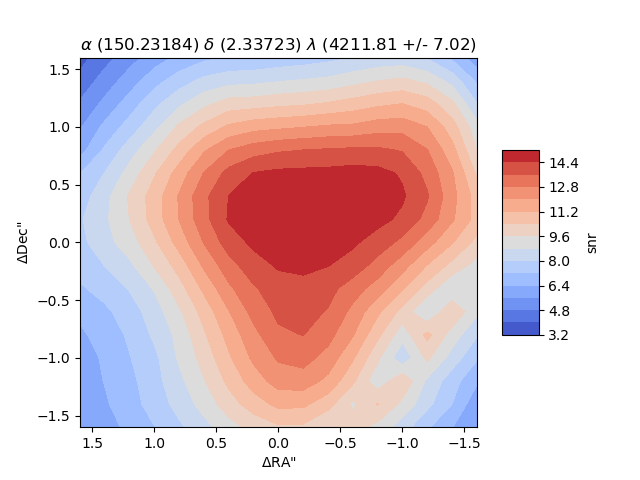

<IPython.core.display.Javascript object>


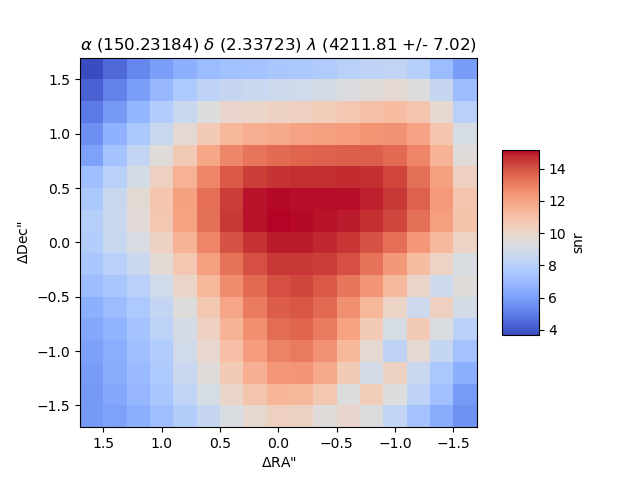

<IPython.core.display.Javascript object>


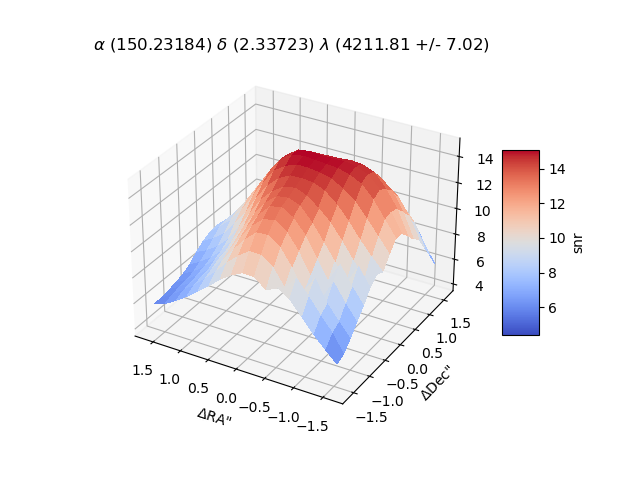

<IPython.core.display.Javascript object>


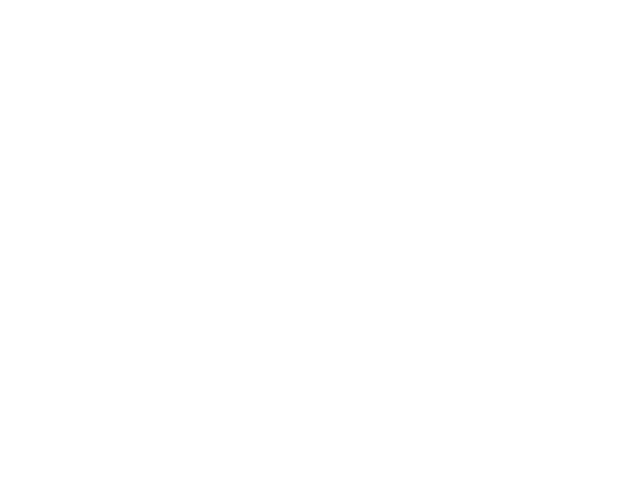

/home/jovyan/work/hub


In [47]:
#
# due to an oddity with the %run magic command, you need to change into the directory with the output
#

#choos one of these keywords as the value
# x0, fitflux, continuum_level, velocity_offset, sigma, rmse, snr, meanflux_density, velocity_offset_limit

%cd grid_demo
%run 3002473388_grid.py snr
%cd ..

# the first two figures are static
# the third figure is interactive
# there is an empy 4th figure ... I don't know why